2번 전력데이터

2050년 1년동안의 5유형(A,B,C,D,E)의 전력사용량을 나타낸다. 각유형의 전력사용량은 1분마다 갱신되며 그 값은 누적된다.
6시간이 지나면(00:00, 06:00, 12:00, 18:00시에) 전력사용량은 0으로 초기화 된다.

- problem2_usage.csv

6시간 간격의 총 전력사용량의 데이터이다. timestamp순서는 섞여있다.
6시간 간격의 특정 시간대(마지막시각 '05:59','11:59','17:59','23:59')의 전력 총합을 나타낸다.
데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.
- problem2_usage_history.csv

1분간격의 A,B,C,D,E 유형의 소비 누적 전력을 나타낸다. 같은 6시간간격의 시간대의 데이터는 같은 "6hour_index"값을 가진다.
00:00, 06:00, 12:00, 18:00시에는 5유형의 전력은 초기화 된다.
데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.
- problem2_avg_tem.csv

2050년 1년동안 일자별 평균 온도를 나타낸다

In [1]:
import pandas as pd
import numpy as np
us=pd.read_csv("problem2_usage.csv")
us.head(3)

,timestamp,usage
0,2551780740,583.7395
1,2534068740,1018.0731
2,2545732740,1034.5041


In [2]:
ush=pd.read_csv("problem2_usage_history.csv")
ush.head(3)

,hh:mm,6hour_index,A,B,C,D,E
0,00:00,DA_588493,0.0000,0.0000,0.0000,0.0000,0.0000
1,00:01,DA_588493,0.7025,0.8029,0.6523,2.6762,0.1505
2,00:02,DA_588493,1.7563,1.2043,1.9570,3.2115,0.6022


2-1 usage의 총사용량을 아래와 같은 모양으로 연월별 총합으로 계산하여 CSV 파일로 작성하시오.

- 일자별 총사용량은 누적사용량이 갱신되기 직전의 최대값들의 합으로 계산한다
- ['05:59','11:59','17:59','23:59'] 시간대의 A,B,C,D,E의 컬럼별 총합이 각 유형의 일일 사용량이다
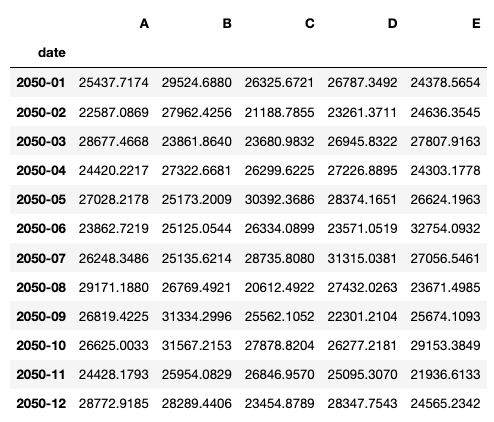

In [3]:
us['time']=pd.to_datetime(us['timestamp'], unit='s')
us=us.sort_values('time').reset_index(drop=True)
us.head(3)

,timestamp,usage,time
0,2524629540,1654.2596,2050-01-01 05:59:00
1,2524651140,1426.9071,2050-01-01 11:59:00
2,2524672740,1448.2517,2050-01-01 17:59:00


In [4]:
s=ush[ush['hh:mm'].isin(['05:59', '11:59', '17:59', '23:59'])]
s2=s.copy()
s2

,hh:mm,6hour_index,A,B,C,D,E
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288
1439,23:59,DA_9075768,162.1927,297.3533,94.6124,716.3510,67.5803
1799,05:59,DA_6294458,269.1807,490.8591,63.3366,142.5075,601.6981
...,...,...,...,...,...,...,...
524159,23:59,DA_6116290,125.7840,67.0849,75.4704,394.1233,167.7121
524519,05:59,DA_5064240,505.7466,82.0129,109.3506,437.4025,218.7012
524879,11:59,DA_8363908,110.4847,501.4306,16.9977,144.4800,67.9906
525239,17:59,DA_7102720,639.6188,232.5887,72.6839,421.5669,72.6840


In [5]:
s2.loc[:, 't']=s.iloc[:, 2:].sum(axis=1).round(4)
#행합계 산출

In [14]:
s2.head(3) #(A,B,C,D,E)의 6시간별 사용기록(hh:mm, 6hour_index, A,B,C,D,E, usage)

,hh:mm,6hour_index,A,B,C,D,E,t
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872,1654.2596
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660,1426.9071
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288,1448.2517


- us, ush, s2 데이터프레임 merge

In [12]:
us.head(3) #6시간별 사용량(usage, time)

,timestamp,usage,time
0,2524629540,1654.2596,2050-01-01 05:59:00
1,2524651140,1426.9071,2050-01-01 11:59:00
2,2524672740,1448.2517,2050-01-01 17:59:00


In [13]:
ush.head(3) #(A,B,C,D,E)의 1분당 사용기록(hh:mm, 6hour_index, A, B, C, D, E)

,hh:mm,6hour_index,A,B,C,D,E
0,00:00,DA_588493,0.0000,0.0000,0.0000,0.0000,0.0000
1,00:01,DA_588493,0.7025,0.8029,0.6523,2.6762,0.1505
2,00:02,DA_588493,1.7563,1.2043,1.9570,3.2115,0.6022


In [23]:
pd.merge(s2.rename(columns={'t':'usage'}).reset_index(drop=True), us)[['6hour_index', 'time']]

,6hour_index,time
0,DA_588493,2050-01-01 05:59:00
1,DA_9340234,2050-01-01 11:59:00
2,DA_3352244,2050-01-01 17:59:00
3,DA_9075768,2050-01-01 23:59:00
4,DA_6294458,2050-01-02 05:59:00
...,...,...
1455,DA_6116290,2050-12-30 23:59:00
1456,DA_5064240,2050-12-31 05:59:00
1457,DA_8363908,2050-12-31 11:59:00
1458,DA_7102720,2050-12-31 17:59:00


In [21]:
zz=pd.merge(ush, pd.merge(s2.rename(columns={'t':'usage'}).reset_index(drop=True), us)[['6hour_index', 'time']])

In [24]:
#전체 수치, time기록
zz.head(3)

,hh:mm,6hour_index,A,B,C,D,E,time
0,00:00,DA_588493,0.0000,0.0000,0.0000,0.0000,0.0000,2050-01-01 05:59:00
1,00:01,DA_588493,0.7025,0.8029,0.6523,2.6762,0.1505,2050-01-01 05:59:00
2,00:02,DA_588493,1.7563,1.2043,1.9570,3.2115,0.6022,2050-01-01 05:59:00


In [25]:
q=zz[zz['hh:mm'].isin(['05:59', '11:59', '17:59', '23:59'])].copy()
q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 359 to 525599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hh:mm        1460 non-null   object        
 1   6hour_index  1460 non-null   object        
 2   A            1460 non-null   float64       
 3   B            1460 non-null   float64       
 4   C            1460 non-null   float64       
 5   D            1460 non-null   float64       
 6   E            1460 non-null   float64       
 7   time         1460 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 102.7+ KB


In [28]:
#time(datetime->str(년,월만 표시))
q.loc[:, 'date']=q['time'].dt.strftime('%Y-%m')
q.head(3)

,hh:mm,6hour_index,A,B,C,D,E,time,date
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872,2050-01-01 05:59:00,2050-01
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660,2050-01-01 11:59:00,2050-01
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288,2050-01-01 17:59:00,2050-01


In [31]:
#수치형 변수만 더해짐
q.groupby('date').sum()

,A,B,C,D,E
date,,,,,
2050-01,25437.7174,29524.6880,26325.6721,26787.3492,24378.5654
2050-02,22587.0869,27962.4256,21188.7855,23261.3711,24636.3545
2050-03,28677.4668,23861.8640,23680.9832,26945.8322,27807.9163
2050-04,24420.2217,27322.6681,26299.6225,27226.8895,24303.1778
2050-05,27028.2178,25173.2009,30392.3686,28374.1651,26624.1963
2050-06,23862.7219,25125.0544,26334.0899,23571.0519,32754.0932
2050-07,26248.3486,25135.6214,28735.8080,31315.0381,27056.5461
2050-08,29171.1880,26769.4921,20612.4922,27432.0263,23671.4985
2050-09,26819.4225,31334.2996,25562.1052,22301.2104,25674.1093


2-2 가로축을 요일(일~월) 세로축을 평균 전력사용량으로 하는 그래프를 그려라. 각 유형별로 색을 다르게 표현하여 5개의 line plot을 그리며 범례를 표시하라

In [32]:
q

,hh:mm,6hour_index,A,B,C,D,E,time,date
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872,2050-01-01 05:59:00,2050-01
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660,2050-01-01 11:59:00,2050-01
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288,2050-01-01 17:59:00,2050-01
1439,23:59,DA_9075768,162.1927,297.3533,94.6124,716.3510,67.5803,2050-01-01 23:59:00,2050-01
1799,05:59,DA_6294458,269.1807,490.8591,63.3366,142.5075,601.6981,2050-01-02 05:59:00,2050-01
...,...,...,...,...,...,...,...,...,...
524159,23:59,DA_6116290,125.7840,67.0849,75.4704,394.1233,167.7121,2050-12-30 23:59:00,2050-12
524519,05:59,DA_5064240,505.7466,82.0129,109.3506,437.4025,218.7012,2050-12-31 05:59:00,2050-12
524879,11:59,DA_8363908,110.4847,501.4306,16.9977,144.4800,67.9906,2050-12-31 11:59:00,2050-12
525239,17:59,DA_7102720,639.6188,232.5887,72.6839,421.5669,72.6840,2050-12-31 17:59:00,2050-12


In [34]:
q['day']=q['time'].dt.day_name()
q

,hh:mm,6hour_index,A,B,C,D,E,time,date,day
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872,2050-01-01 05:59:00,2050-01,Saturday
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660,2050-01-01 11:59:00,2050-01,Saturday
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288,2050-01-01 17:59:00,2050-01,Saturday
1439,23:59,DA_9075768,162.1927,297.3533,94.6124,716.3510,67.5803,2050-01-01 23:59:00,2050-01,Saturday
1799,05:59,DA_6294458,269.1807,490.8591,63.3366,142.5075,601.6981,2050-01-02 05:59:00,2050-01,Sunday
...,...,...,...,...,...,...,...,...,...,...
524159,23:59,DA_6116290,125.7840,67.0849,75.4704,394.1233,167.7121,2050-12-30 23:59:00,2050-12,Friday
524519,05:59,DA_5064240,505.7466,82.0129,109.3506,437.4025,218.7012,2050-12-31 05:59:00,2050-12,Saturday
524879,11:59,DA_8363908,110.4847,501.4306,16.9977,144.4800,67.9906,2050-12-31 11:59:00,2050-12,Saturday
525239,17:59,DA_7102720,639.6188,232.5887,72.6839,421.5669,72.6840,2050-12-31 17:59:00,2050-12,Saturday


In [37]:
daydf=q.groupby('day').mean().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

<AxesSubplot:xlabel='day'>

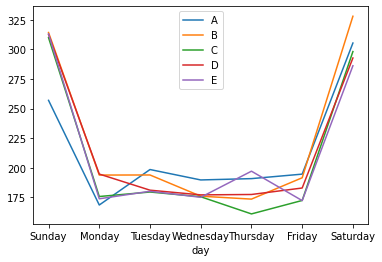

In [38]:
daydf.plot()